# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Data Collection and Analysis

In [2]:
loan_dataset = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset.shape

(614, 13)

In [6]:

loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_dataset = loan_dataset.dropna()

In [9]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan_dataset.shape

(480, 13)

In [11]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
loan_dataset.replace({'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 4}}, inplace = True)

In [13]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [14]:
loan_dataset['Dependents']

1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 480, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

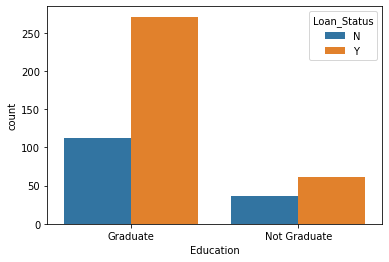

In [15]:
# Education and Loan_Status
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_dataset)
# - Here X axis contain the different values in the column Education and Y axis will contain the count of people
# having Loan_Status as 0 or 1 belonging to a particular type of education.
# - Here we can see that Graduate people get loan approved more easily.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

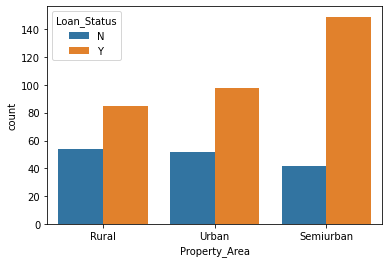

In [16]:
# Property_Area and Loan_Status
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = loan_dataset)
# - Here we can see people having Semiurban property get their loan approved more easily.

<AxesSubplot:xlabel='Married', ylabel='count'>

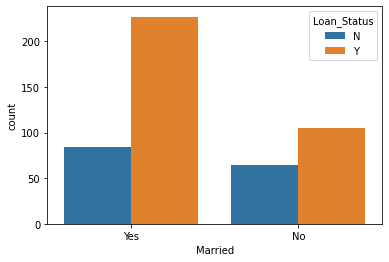

In [17]:
# Marital status and Loan Status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset)
# - Here we can see that the people having married get their loan approved more easily owing to the fact that their spouse 
# too might earn making it easy to repay the loan.

In [18]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [19]:
# Separating the data and label
X = loan_dataset.drop(columns = ['Loan_ID', 'Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [20]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 1, 2, 3, 4, 10])], remainder = 'passthrough')

X = ct.fit_transform(X)

In [21]:
print(X)

[[  0.   1.   0. ... 128. 360.   1.]
 [  0.   1.   0. ...  66. 360.   1.]
 [  0.   1.   0. ... 120. 360.   1.]
 ...
 [  0.   1.   0. ... 253. 360.   1.]
 [  0.   1.   0. ... 187. 360.   1.]
 [  1.   0.   1. ... 133. 360.   0.]]


In [22]:
le = LabelEncoder()

Y = le.fit_transform(Y)

In [23]:
print(Y)

[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(480, 20) (432, 20) (48, 20)


In [26]:
print(X)

[[  0.   1.   0. ... 128. 360.   1.]
 [  0.   1.   0. ...  66. 360.   1.]
 [  0.   1.   0. ... 120. 360.   1.]
 ...
 [  0.   1.   0. ... 253. 360.   1.]
 [  0.   1.   0. ... 187. 360.   1.]
 [  1.   0.   1. ... 133. 360.   0.]]


In [27]:
print(X_train)

[[  1.   0.   1. ... 137. 360.   0.]
 [  0.   1.   0. ...  95. 360.   1.]
 [  0.   1.   0. ... 187. 180.   1.]
 ...
 [  0.   1.   1. ... 176. 360.   1.]
 [  1.   0.   1. ...  99. 300.   1.]
 [  0.   1.   0. ... 130. 360.   1.]]


In [28]:
print(X_test[0])

[0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 1.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 6.325e+03 0.000e+00 1.750e+02 3.600e+02 1.000e+00]


In [29]:
print(Y.shape, Y_train.shape, Y_test.shape)

(480,) (432,) (48,)


In [30]:
print(Y)

[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [31]:
print(Y_train)

[1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1]


In [32]:
print(Y_test)

[1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 1 1 1]


In [33]:
sc = StandardScaler()

X_train[:, 5:9] = sc.fit_transform(X_train[:, 5:9])

In [34]:
print(X_train)

[[  1.   0.   1. ... 137. 360.   0.]
 [  0.   1.   0. ...  95. 360.   1.]
 [  0.   1.   0. ... 187. 180.   1.]
 ...
 [  0.   1.   1. ... 176. 360.   1.]
 [  1.   0.   1. ...  99. 300.   1.]
 [  0.   1.   0. ... 130. 360.   1.]]


In [35]:
X_test[:, 5:9] = sc.transform(X_test[:, 5:9])

In [36]:
print(X_test)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  2.19950854e+00 -4.47213595e-01 -3.10558691e-01
   5.02169208e-01  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  6.32500000e+03
   0.00000000e+00  1.75000000e+02  3.60000000e+02  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00 -4.54647018e-01 -4.47213595e-01  3.22000327e+00
   5.02169208e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  5.26600000e+03
   1.77400000e+03  1.87000000e+02  3.60000000e+02  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00 -4.54647018e-01 -4.47213595e-01  3.22000327e+00
   5.02169208e-01  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  4.00000000e+03
   7.75000000e+03  2.90000000e+02  3.60000000e+02  1.00000000e+00]
 [ 0.00

# Model Training

Model Training ---> Support Vector Classifier

In [37]:
classifier = svm.SVC(kernel='linear')

In [38]:
# training the Support Vector Machine Model
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [39]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print(f'Accuracy on training data when using Support Vector Classifier: {training_data_accuracy}')

Accuracy on training data when using Support Vector Classifier: 0.7824074074074074


In [41]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print(f'Accuracy on test data when using Support Vector Classifier: {test_data_accuracy}')

Accuracy on test data when using Support Vector Classifier: 0.8541666666666666


# Model Training

Model Training ---> Logistic Regression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, Y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

1. Accuracy Score

In [45]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy on training data using Logistic Regression: {training_data_accuracy}")

Accuracy on training data using Logistic Regression: 0.7870370370370371


In [46]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on testing data using Logistic Regression: {testing_data_accuracy}")

Accuracy on testing data using Logistic Regression: 0.8125


Making a Predictive System

# Model Training

Model Training ---> Support Vector Classifier with rbf kernel

In [47]:
model_SVC_rbf = svm.SVC(kernel = 'rbf', random_state = 0)

In [48]:
model_SVC_rbf.fit(X_train, Y_train)

SVC(random_state=0)

Model Evaluation

1. Accuracy Score

In [49]:
X_train_prediction = model_SVC_rbf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy on training data using Support Vector Classifier: {training_data_accuracy}")

Accuracy on training data using Support Vector Classifier: 0.6990740740740741


In [50]:
X_test_prediction = model_SVC_rbf.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on testing data Support Vector Classifier: {testing_data_accuracy}")

Accuracy on testing data Support Vector Classifier: 0.6875


Making a Predictive System

# Model Training

Model Training ---> Naive Bayes

In [51]:
model_NaiveBayes = GaussianNB()
model_NaiveBayes.fit(X_train, Y_train)

GaussianNB()

Model Evaluation

1. Accuracy Score

In [52]:
X_train_prediction = model_NaiveBayes.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy on training data when using Naive Bayes: {training_data_accuracy}")

Accuracy on training data when using Naive Bayes: 0.7986111111111112


In [53]:
X_test_prediction = model_NaiveBayes.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on testing data when using Naive Bayes: {testing_data_accuracy}")

Accuracy on testing data when using Naive Bayes: 0.8125


Making a Predictive System

# Model Training

Model Training ---> K Nearest Neighbours

In [54]:
model_KNearestNeighbours = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_KNearestNeighbours.fit(X_train, Y_train)

KNeighborsClassifier()

Model Evaluation

1. Accuracy Score

In [55]:
X_train_prediction = model_KNearestNeighbours.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy on training data when using K Nearest Neighbours: {training_data_accuracy}")

Accuracy on training data when using K Nearest Neighbours: 0.7430555555555556


In [56]:
X_test_prediction = model_KNearestNeighbours.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on testing data when using K Nearest Neighbours: {testing_data_accuracy}")

Accuracy on testing data when using K Nearest Neighbours: 0.6666666666666666


Making a Predictive System

# Model Training

Model Training ---> Decision Trees

In [57]:
model_DecisionTrees = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model_DecisionTrees.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Model Evaluation

1. Accuracy Score

In [58]:
X_train_prediction = model_DecisionTrees.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy on training data when using Decision Trees: {training_data_accuracy}")

Accuracy on training data when using Decision Trees: 1.0


In [59]:
X_test_prediction = model_DecisionTrees.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on testing data when using Decision Trees: {testing_data_accuracy}")

Accuracy on testing data when using Decision Trees: 0.7083333333333334


Making a Predictive System

# Model Training

Model Training ---> Random Forest Classifier

In [60]:
model_RandomForestClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_RandomForestClassifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Model Evaluation

1. Accuracy Score

In [61]:
X_train_prediction = model_RandomForestClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f"Accuracy on training data when using K Nearest Neighbours: {training_data_accuracy}")

Accuracy on training data when using K Nearest Neighbours: 0.9884259259259259


In [62]:
X_test_prediction = model_RandomForestClassifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on testing data when using K Nearest Neighbours: {testing_data_accuracy}")

Accuracy on testing data when using K Nearest Neighbours: 0.7916666666666666


Making a Predictive System